# Datacamp's Russia's alcohol consumption mini contest

This project uses russian_alcohol_consumption.csv to recommend top 10 similar region that has the same wine consumption as a promotion campain of Saint Peterburgs

## Objective
- Pretify matplotlib color pannels, gradients and stylings to make more beautiful graphs
- Using clustering algorithm to find top ten similar region as Saint Peterburgs to promote wine campain

## Work
- EDA: tạo các dataframes phù hợp để inject vào bên trong các thuật toán ko giám sát
- Do các thuật toán cơ bản bias và ảnh hưởng rất nhiều bởi lựa chọn hạt nhân (kernal) và randomness, yêu cầu kết hợp nhìu loại học ko giám sát với nhau

1. Dùng Fcluster kết hợp với dendrogram để tìm ra cụm sơ cấp của Saint P
2. Dùng Kmean để cross check với dendrogram. Từ đó, ta có thể suy ra top nth recommended value chỉ bằng cluster analysis

## The data.

In [1]:
import pandas as pd
df = pd.read_csv(r'./data/russian_alcohol_consumption.csv')

#### Shape

In [2]:
df.year.max()

2016

#### Df info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


Tỉ lệ missing data giữa các candidate variable là:

In [4]:
df.isna().sum() / len(df)

year         0.000000
region       0.000000
wine         0.039009
beer         0.035913
vodka        0.037771
champagne    0.039009
brandy       0.040867
dtype: float64

con số này quá nhỏ, nên ta có thể loại hoàn toàn các missing data đi

In [5]:
df.dropna(inplace=True)
len(df)

1549

#### Tạo các subset dataframe

deep copy so that we can seperately use for EDA and clustering

table only contain alcohol

In [6]:
alcohol = df.copy(deep=True)
alcohol = alcohol[["beer","vodka", "champagne", "brandy", 'wine']]
alcohol['sum'] = alcohol['beer'] + alcohol['vodka'] + alcohol['champagne'] + alcohol['brandy'] + alcohol['wine']

alchohol consumption throughout the year of Saint Peterburg

In [7]:
sp = df.copy(deep=True)
sp = sp[sp['region'] == 'Saint Petersburg']
sp['sum'] = sp['beer'] + sp['vodka'] + sp['champagne'] + sp['brandy'] + sp['wine']


mean alcohol consumption of Russia throughout the year

In [8]:
mu_alcohol = pd.DataFrame(df.groupby('year')[['beer', 'vodka', 'champagne', 'brandy', 'wine']].mean()).reset_index()
mu_alcohol['sum'] = mu_alcohol['beer'] + mu_alcohol['vodka'] + mu_alcohol['champagne'] + mu_alcohol['brandy'] + mu_alcohol['wine']

dataframe for hierarchical clustering

Lưu ý: mọi dataframe đc sử dụng cho hierarchical clustering là 1 aggregation dataframe, tức nó bắt buộc phải đc group by bởi date hoặc sex hoặc bất cứ cột gì khác nếu label nó xuất hiện nhìu lần

In [9]:
from df_transformers import df_by_year, merge_multiple_df

In [10]:
hier_mean = pd.DataFrame(df.groupby('region')[['beer', 'vodka', 'champagne', 'brandy', 'wine']].mean()).reset_index()
hier_max = pd.DataFrame(df.groupby('region')[['beer', 'vodka', 'champagne', 'brandy', 'wine']].max()).reset_index()
hier_2010 = df_by_year(df, 2010, 'region').reset_index()
hier_2016 = df_by_year(df, 2016, 'region').reset_index()
hier_2015 = df_by_year(df, 2015, 'region').reset_index()
hier_2014 = df_by_year(df, 2014, 'region').reset_index()

c:\Users\LETPC\Nhan\projects\data science\wine promotion\df_transformers.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returned_df.rename(columns=new_column_list, inplace=True)
c:\Users\LETPC\Nhan\projects\data science\wine promotion\df_transformers.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returned_df.rename(columns=new_column_list, inplace=True)
c:\Users\LETPC\Nhan\projects\data science\wine promotion\df_transformers.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [11]:
frames = [hier_mean, hier_max, hier_2010, hier_2016, hier_2015, hier_2014]
df_merged = merge_multiple_df(frames, 'region', 'region')
df_merged

,beer_x,vodka_x,champagne_x,brandy_x,wine_x,beer_y,vodka_y,champagne_y,brandy_y,wine_y,...,beer_2015,vodka_2015,champagne_2015,brandy_2015,year_2014,wine_2014,beer_2014,vodka_2014,champagne_2014,brandy_2014
region,,,,,,,,,,,,,,,,,,,,,
Altai Krai,48.373158,9.465789,1.207368,0.236842,3.174211,70.40,14.2,1.54,0.40,4.80,...,45.8,4.5,0.9,0.3,2014,4.1,52.5,5.5,1.0,0.3
Altai Republic,36.724211,9.683684,0.934737,0.253684,5.190000,62.90,11.7,1.40,0.52,6.70,...,40.3,7.7,1.0,0.3,2014,4.2,39.0,8.8,1.4,0.4
Amur Oblast,53.377368,14.216842,1.115789,0.396842,5.221579,83.27,20.8,1.90,0.70,7.60,...,50.7,6.7,1.5,0.5,2014,6.1,64.0,8.3,1.8,0.6
Arkhangelsk Oblast,47.036842,17.381053,1.631053,0.870526,8.670000,109.00,31.9,2.60,1.30,12.23,...,49.1,11.8,1.8,0.9,2014,10.7,64.4,12.8,2.0,1.0
Astrakhan Oblast,54.695263,9.296842,0.861579,0.361053,4.469474,79.70,12.9,1.10,0.70,6.10,...,37.4,4.7,0.9,0.6,2014,5.1,62.9,5.8,1.0,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vologda Oblast,67.206842,17.217895,0.857368,0.517895,9.328421,108.60,26.7,1.30,0.80,18.10,...,34.7,9.3,1.1,0.6,2014,10.0,63.7,11.1,1.2,0.6
Voronezh Oblast,54.911053,9.916316,1.500000,0.402105,4.637895,85.20,14.2,2.30,0.60,7.50,...,51.1,4.1,1.4,0.5,2014,5.8,63.9,4.9,1.6,0.6
Yamalo-Nenets Autonomous Okrug,80.137895,15.093158,1.485789,0.951579,5.312105,106.60,23.3,2.53,1.80,7.70,...,82.7,8.6,1.9,1.3,2014,5.0,86.2,10.2,2.0,1.5


#### EDA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from plot_graph import plot_catplot_columns, plot_lineplot_comparison
plt.rcParams["figure.figsize"] = (15,8)
sns.set(style="whitegrid")


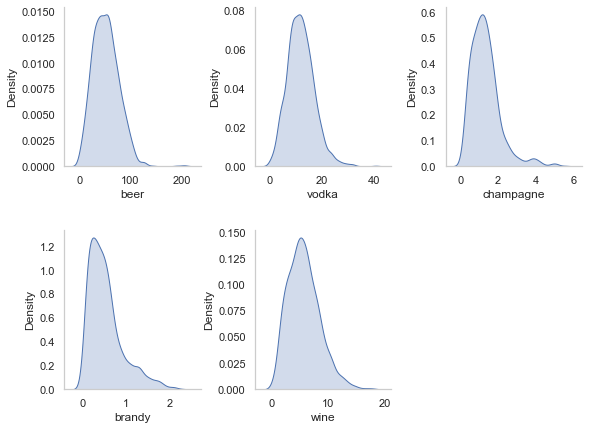

In [13]:
plot_catplot_columns(alcohol, ["beer","vodka", "champagne", "brandy", 'wine', 'sum'], sns.kdeplot, shade=True)
sns.despine()

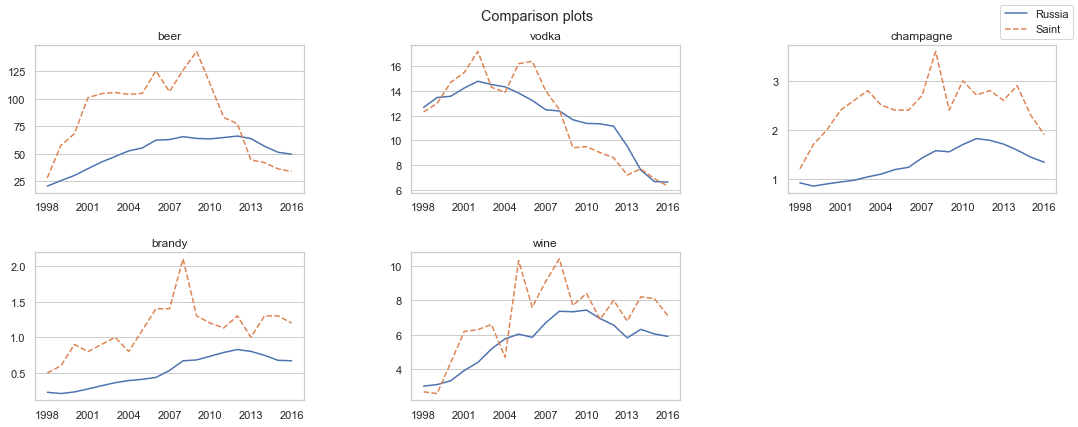

In [14]:
plot_lineplot_comparison(df_1=mu_alcohol, df_2=sp, x='year', cols=["beer","vodka", "champagne", "brandy", "wine"], 
                         legend=["Russia", "Saint"], figsize=(15, 6))

# Thuật toán phân cấp cụm bằng dendrogram

## Dùng plotly để tạo interactive dendrogram

In [15]:
from plot_graph import draw_plotly_f_cluster

In [16]:
fig1 = draw_plotly_f_cluster(df_merged, list(df_merged.index), orient='left', color_threshold=100)
fig1.show()

## Extract các labels theo màu bằng scipy.fcluster bằng các tham số từ plotly

Đầu tiên, ta thấy rằng, nếu để color_thresh = 100, Saint-P thuộc cụm số 4, alongside 18 cái label khác. Khi hạ tham số xuống 75, Saint-P rớt xuống cụm phân loại số 5, cùng với chỉ 3 label khác.

Khi data thay đổi, hierarchical cũng thay đổi, lúc này, ta phải dynamically lấy label của cụm

Plotly thực chất là 1 wrapper cho scipy.dendrogram. Do đó, nếu sử dụng chung 1 tham số, ta có số cụm và label tương tự plotly.

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy_f_cluster import ScipyFcluster
dn_params = {
    'color_threshold': 100,
    'leaf_font_size': 10,
    'orientation': 'right'
}

In [18]:
dn_cls = ScipyFcluster(df_merged)
dn_cls1 = ScipyFcluster(df_merged, normalize=False)

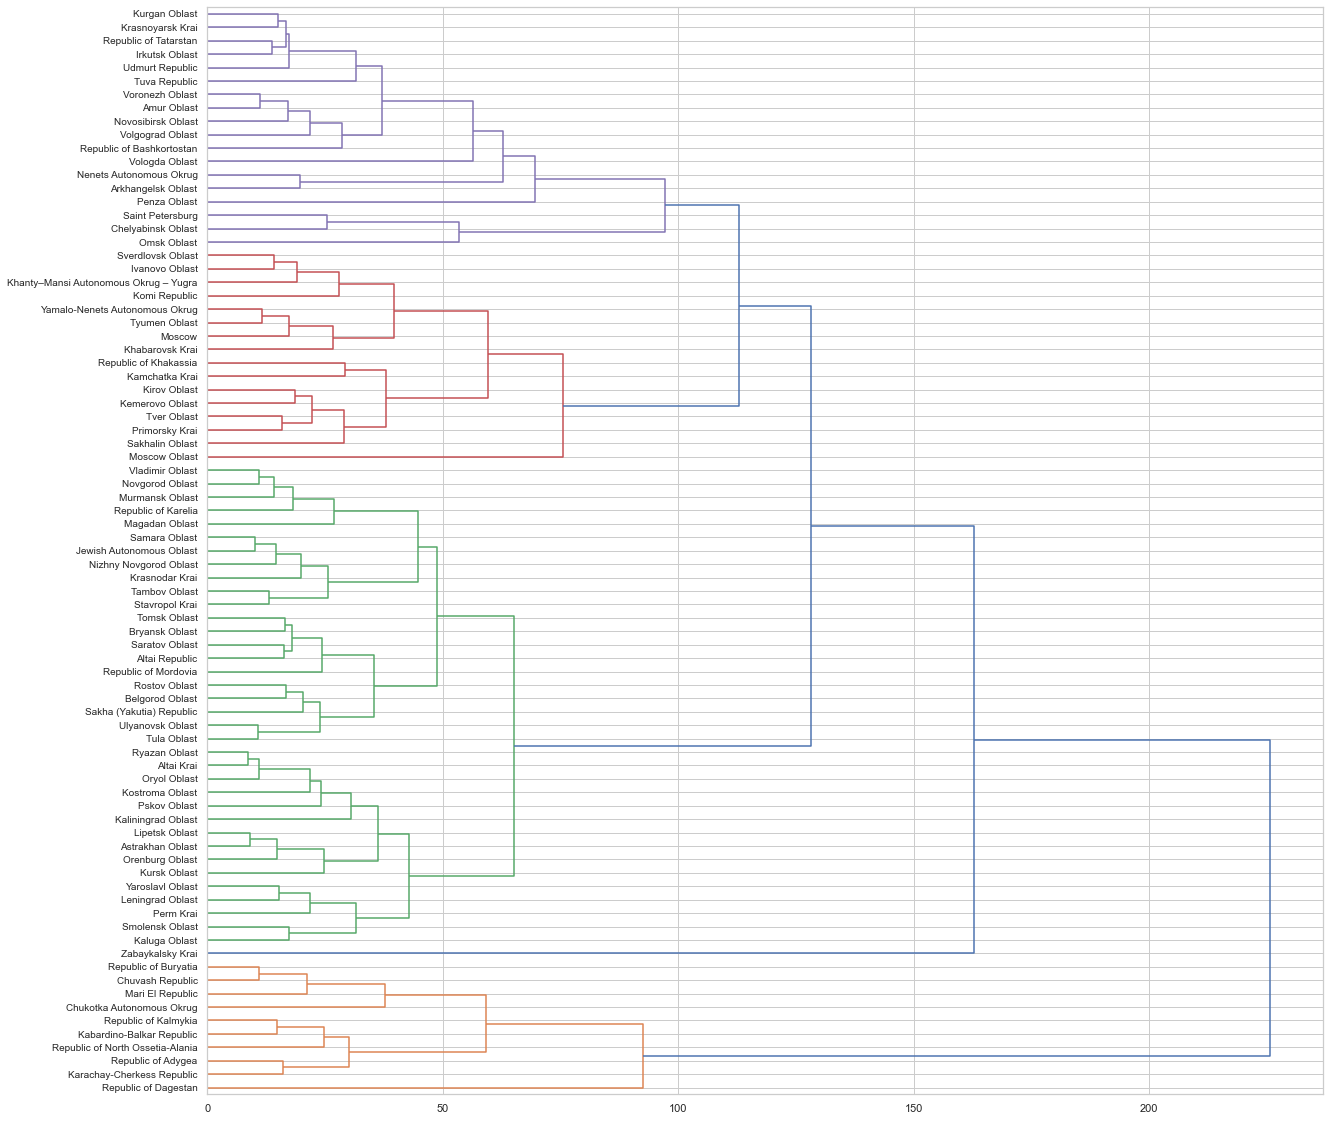

In [19]:
dn_cls.draw_dendrogram(**dn_params)

# Dùng thuật toán KMeans để xác định cụm sơ cấp

Bài toán KMeans là 1 bài toán hạt nhân, tức, ta phải chọn số lượng hạt nhân trước khi bài toán đc phân loại.

Ngoài ra, Kmeans cũng là 1 bài toán random, tức seeding 1 hạt nhân vào 1 vị trí hoàn toàn due to randomness, dẫn tới kết quả của bài toán vô cùng khác biệt 

Do đó, bài toán KMeans ko bao giờ đc chạy lúc đầu, ta phải luôn luôn cần kết quả của Fcluster để gain insight on Kmeans

In [20]:
from KMean_clustering import KMeanClustering

In [21]:
k_cls = KMeanClustering(df_merged)
k_cls.run_clustering(11)

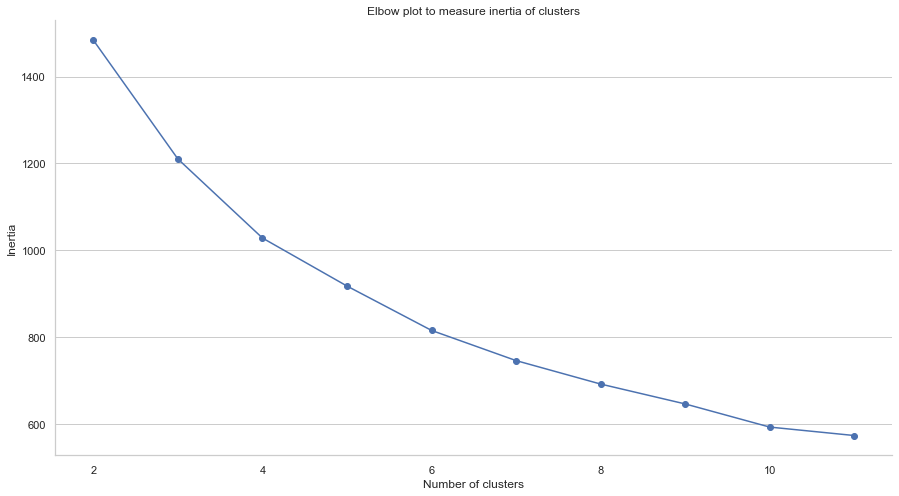

In [22]:
k_cls.plot_inertia_elbow_plot()

Inertia của KMeans hầu như là fail hoàn toàn, tuy nhiên, dựa vào Fcluster, ta có thể lấy 4 cụm

Lưu ý: Kmeans Clustering là hạt nhân đa chiều, do đó, ko thể plot lên 1 mặt phẳng xy đc. để plot nó lên 1 mặt phẳng xy, bắt buộc phải PCA nó xuống còn 2 trục

In [60]:
ttt = k_cls.get_label()

Ta sẽ lấy cụm 4 để lấy labels của tất cả các data có chung cụm với Saint P

In [61]:
def count_region_by_k_value(k:str, df):
    ttt = df[[k]]
    k_val = ttt.loc['Saint Petersburg'].values[0]
    similar = ttt[ttt[k] == k_val]
    return len(similar)


In [62]:
k4 = count_region_by_k_value('k=4', ttt)
k5 = count_region_by_k_value('k=5', ttt)
k6 = count_region_by_k_value('k=6', ttt)

Như vậy, giá trị khi k=4 ko khác với Fcluster, chứng tỏ kmean vẫn phân hạt nhân đúng (và fcluster phân hạt nhân đúng)

tại k=6, ta narrow đc có tận 7 khu vực có độ similar tương tự với Saint-P